#**HOMEWORK 1: BLUE BIKE TRIP DURATION PREDICTION (Total: / 25 points)**

# Members: 
* Yilun Wang / yilun830@bu.edu
* Yipeng Guo / ypguo@bu.edu

Make sure that you answer the four questions provided at the front of the notebook (edit the XXX response sections to provide your answers). You probably want to answer these last, after you finish the hands-on portion of the assignment. 

#**Answers to Written Questions (10 points)**

**Question 1: What features did you opt to keep, and which did you discard? Why? (2.5 points)**

XXX

**Question 2: What transformations did you apply to the data, in terms of pre-procesing? Why? What feature engineering can you do here to help the model along? (2.5 points)**


XXX

**Question 3: What activation functions did you consider for the output layer? Which did you rule out? Why? (2.5 points)**

XXX

**Question 4: What steps did you take to ensure the robustness of your model's performance, e.g., to avoid overfitting, or compatibility with new samples of data? (2.5 points)**

XXX

#**Implement Neural Network (12 Points)**

Modify the placeholder codeblocks below to implement your neural network. 

##*Import and Pre-process Data*

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# No need to change this; this is the dataset I'm providing to you for training.
bluebikes = pd.read_csv('https://raw.githubusercontent.com/gburtch/BA865-2022/main/Week%203/datasets/bluebikes_sample.csv')



In [2]:
bluebikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             9000 non-null   int64  
 1   starttime                9000 non-null   object 
 2   stoptime                 9000 non-null   object 
 3   start station id         9000 non-null   int64  
 4   start station name       9000 non-null   object 
 5   start station latitude   9000 non-null   float64
 6   start station longitude  9000 non-null   float64
 7   end station id           9000 non-null   int64  
 8   end station name         9000 non-null   object 
 9   end station latitude     9000 non-null   float64
 10  end station longitude    9000 non-null   float64
 11  bikeid                   9000 non-null   int64  
 12  usertype                 9000 non-null   object 
 13  birth year               9000 non-null   int64  
 14  gender                  

In [3]:
bluebikes.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1584,09:36.7,36:00.9,442,Hyde Park Ave at Walk Hill St,42.296067,-71.116012,122,Burlington Ave at Brookline Ave,42.345733,-71.100694,4587,Subscriber,1967,1
1,894,40:48.2,55:43.0,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,144,Rogers St & Land Blvd,42.365758,-71.076994,2340,Subscriber,1994,1
2,973,58:05.4,14:18.4,57,Columbus Ave at Massachusetts Ave,42.340543,-71.081388,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,2910,Subscriber,1994,1
3,606,46:45.0,56:51.4,149,175 N Harvard St,42.363796,-71.129164,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4526,Subscriber,1992,1
4,428,49:27.9,56:36.7,426,Surface Rd at Summer St,42.352946,-71.056564,420,Charles St at Pinckney St,42.358725,-71.070795,3780,Subscriber,1989,1


In [4]:
#check NA
bluebikes.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [5]:
#check type
type(bluebikes['tripduration'][0])

numpy.int64

In [15]:
# This function MUST return a pair of objects (predictors, labels, in that order) as numpy arrays.
def processData(data):
    
    ### YOUR CODE GOES HERE.\
    del data['usertype']
    del data['start station name']
    del data['end station name']
    del data['starttime']
    del data['stoptime']
    
    # Make sure you send back a pair of numpy arrays that can then feed into your NN model.
    predictors = np.array(data[['start station id','start station latitude','start station longitude',
          'end station id','end station latitude','end station longitude','bikeid','gender','birth year',]])
    labels = np.array(data['tripduration'])

    return predictors, labels


#*Specify Your Neural Network Architecture, Process Your Sample*

Calling the data pre-processing function on the dataset.

In [17]:
predictors, labels = processData(bluebikes)

In [19]:
type(predictors)
type(labels)

numpy.ndarray

In [20]:
#check predictors
predictors.head(3)

AttributeError: ignored

In [ ]:
#check label
labels.head(3)

0    1584
1     894
2     973
Name: tripduration, dtype: int64

Setting up the Neural Network; you should evaluate your model's loss in terms of MAE (I'm going to do the same).

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(750, activation="linear"),
        layers.Dense(50, activation="relu",kernel_regularizer="l2"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1, activation="sigmoid")

    ])
    model.compile(optimizer="sgd", loss="mae", metrics=["mae"])
    return model

#num_epochs = 10
#batch_sizes = 50

#model = build_model()
#history = model.fit(predictors, labels, epochs= num_epochs, batch_size=batch_sizes)


data_train = predictors[:8000]
labels_train = labels[:8000]
data_test = predictors[8000:]
labels_test = labels[8000:]

k = 4
num_validation_samples = len(data_train) // k
num_epochs = 50
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_mae']
    loss_history = history.history['loss']
    acc_history = history.history['binary_accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

Epoch 1/50
240/240 [==============================] - 3s 7ms/step - loss: 858.3423 - mae: 857.4450 - val_loss: 834.2861 - val_mae: 833.4310
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 858.2603 - mae: 857.4450 - val_loss: 834.2075 - val_mae: 833.4310
Epoch 3/50
240/240 [==============================] - 1s 3ms/step - loss: 858.1863 - mae: 857.4450 - val_loss: 834.1364 - val_mae: 833.4310
Epoch 4/50
240/240 [==============================] - 1s 4ms/step - loss: 858.1180 - mae: 857.4450 - val_loss: 834.0720 - val_mae: 833.4310
Epoch 5/50
240/240 [==============================] - 1s 4ms/step - loss: 858.0564 - mae: 857.4450 - val_loss: 834.0144 - val_mae: 833.4310
Epoch 6/50
240/240 [==============================] - 1s 3ms/step - loss: 858.0014 - mae: 857.4450 - val_loss: 833.9607 - val_mae: 833.4310
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 857.9487 - mae: 857.4450 - val_loss: 833.9113 - val_mae: 833.4310
Epoch 8/50
240/240 [

KeyError: ignored

Plot model loss over epochs to undertand its performance.

In [24]:
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


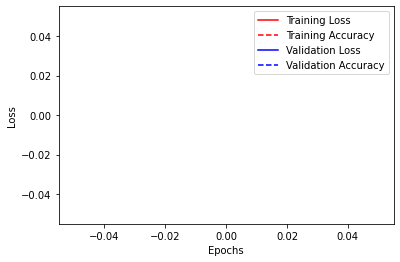

In [25]:
import matplotlib.pyplot as plt
plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()


# Fill this in.
#plt.plot()
#plt.show()

#*Once You Choose the Final Configuration, Output that Model Here*

In [ ]:
model = build_model()
model.fit(predictors,labels,epochs=num_epochs, batch_size=batch_sizes)

Take a look at your model's final structure:

In [ ]:
model.summary()

#**Instructor Code Evaluation** (3 points)

Do not modify this section; this is the code I will use to evaluate that your model is output properly and that it can generate predictions on new test observations it has never seen before. If your model breaks when I feed it the new data, I will deduct marks, so please ensure that your data pre-processing function works properly!

In [ ]:
from google.colab import files
import io
import pandas as pd

# I am going to upload my holdout dataset and pass it to your final model. This data will have the exact same set of columns as the data I gave you to fit your model to.
uploaded = files.upload()
bluebike_holdout = pd.read_csv(io.BytesIO(uploaded['bluebikes_holdout.csv']))

# I'm then going to pre-process it using your data processing function.
holdout_predictors, holdout_labels = processData(bluebike_holdout)

# Then, I'm going to request your model's prediction performance. 
# I expect you should be able to predict trip durations within at least 1000 seconds of ground truth, on average (at worst).
loss_metrics = model.evaluate(holdout_predictors,holdout_labels,verbose=1)